Original Image Size (Height, Width): (800, 800)
Filtered Image Size (Height, Width): (800, 800)


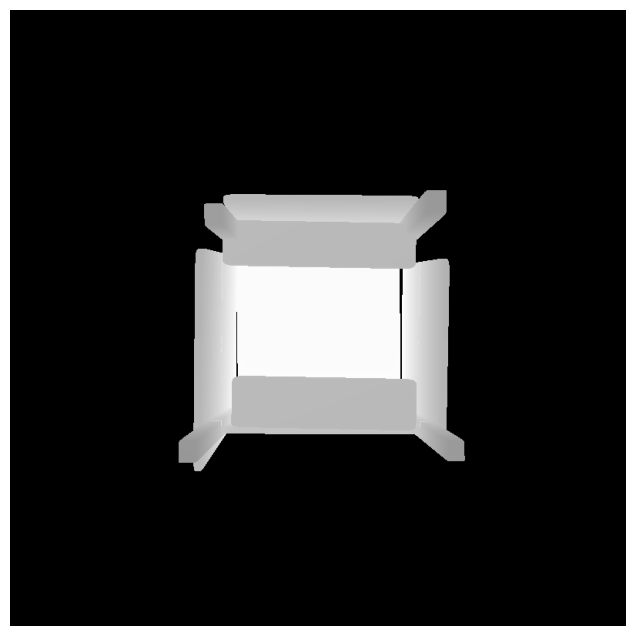

In [7]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the depth image
depth_image_path = "/Users/cmazzoleni/Documents/GitHub/CuboidAbstractionViaSeg/data/processed/chair_cuboid_6views_depth/e5a65fb8c660ef96dbbc9440457e303e_depth_bottom.png"
depth_image = o3d.io.read_image(depth_image_path)

# Convert the depth image to a NumPy array
depth_array = np.asarray(depth_image)

# Print the original image size
original_image_size = depth_array.shape
print("Original Image Size (Height, Width):", original_image_size)

# Optionally, you can normalize the depth values for visualization
depth_normalized = (depth_array - depth_array.min()) / (depth_array.max() - depth_array.min())

# Define the depth range for the mask (e.g., between 0.2 and 0.5 in normalized depth)
min_depth = 0.1
max_depth = 0.99

# Create a depth mask where depth values are within the specified range
depth_mask = (depth_normalized >= min_depth) & (depth_normalized <= max_depth)

# Apply the depth mask to the normalized depth image (retain only values within the range)
masked_depth = np.where(depth_mask, depth_normalized, 0)

# Print the image size after filtering
filtered_image_size = masked_depth.shape
print("Filtered Image Size (Height, Width):", filtered_image_size)

# Convert the masked depth array to an image for visualization
masked_depth_image = Image.fromarray((masked_depth * 255).astype(np.uint8))

# Show the masked depth image without grid, title, axis, or labels
plt.figure(figsize=(masked_depth_image.size[0] / 100, masked_depth_image.size[1] / 100), dpi=100)
plt.imshow(masked_depth_image, cmap='gray')
plt.axis('off')  # Disable axis
plt.show()

# Save the masked depth image
masked_depth_image.save("masked_image.png")

